In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as msgn

# 1- Load data

In [116]:
data = pd.read_csv('student_data.csv')

In [117]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [118]:
data.shape

(395, 33)

In [119]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [121]:
def visualise_features(data):
    cols = list(data.columns)
    for col in cols:
        print(f"col name: {col}\nuniques: {data[col].loc[-100:].unique()}\nnumber  of uniques{data[col].loc[-100:].nunique()}\ntype: {type(data[col][0])}")
        print(150 * '-')

In [122]:
visualise_features(data)

col name: school
uniques: ['GP' 'MS']
number  of uniques2
type: <class 'str'>
------------------------------------------------------------------------------------------------------------------------------------------------------
col name: sex
uniques: ['F' 'M']
number  of uniques2
type: <class 'str'>
------------------------------------------------------------------------------------------------------------------------------------------------------
col name: age
uniques: [18 17 15 16 19 22 20 21]
number  of uniques8
type: <class 'numpy.int64'>
------------------------------------------------------------------------------------------------------------------------------------------------------
col name: address
uniques: ['U' 'R']
number  of uniques2
type: <class 'str'>
------------------------------------------------------------------------------------------------------------------------------------------------------
col name: famsize
uniques: ['GT3' 'LE3']
number  of uniques2
type: <cla

# 2- Data visualisation 

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'traveltime'}>],
       [<Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'failures'}>,
        <Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'freetime'}>],
       [<Axes: title={'center': 'goout'}>,
        <Axes: title={'center': 'Dalc'}>,
        <Axes: title={'center': 'Walc'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'absences'}>,
        <Axes: title={'center': 'G1'}>, <Axes: title={'center': 'G2'}>,
        <Axes: title={'center': 'G3'}>]], dtype=object)

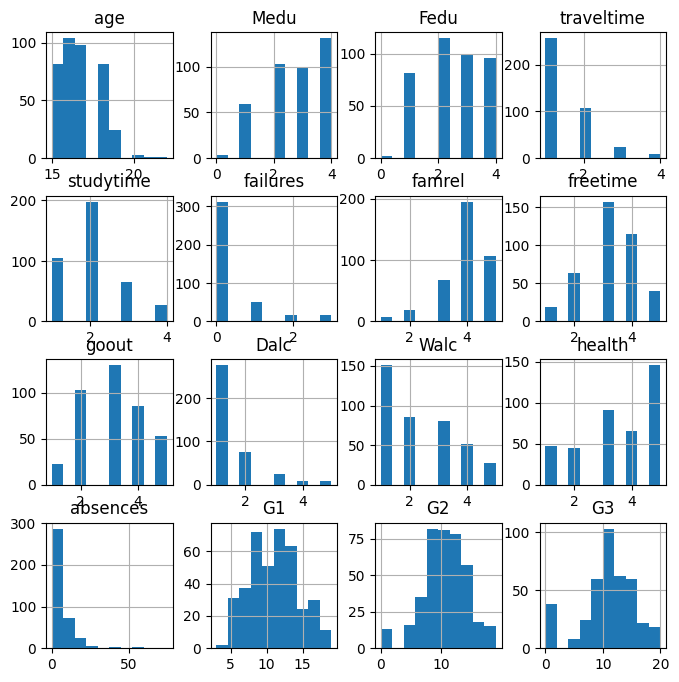

In [123]:
data.hist(figsize=(8, 8))

<Axes: ylabel='Gender'>

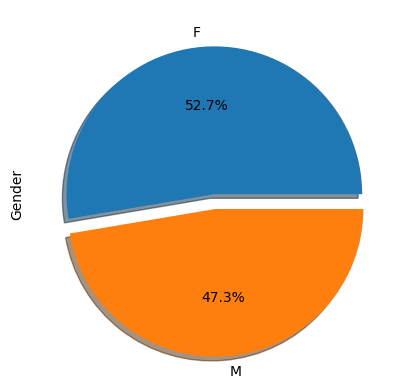

In [124]:
data['sex'].value_counts().plot.pie(shadow=True,label='Gender',explode=[0,0.1], autopct='%1.1f%%')

<Axes: ylabel='school'>

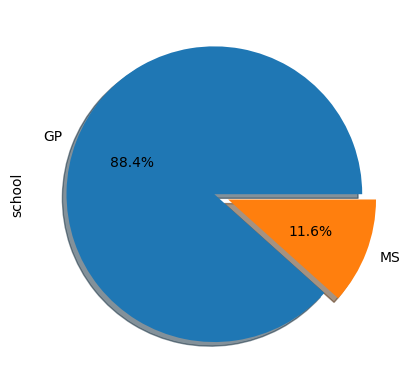

In [125]:
data['school'].value_counts().plot.pie(shadow=True,label='school',explode=[0,0.1], autopct='%1.1f%%')

<Axes: ylabel='address'>

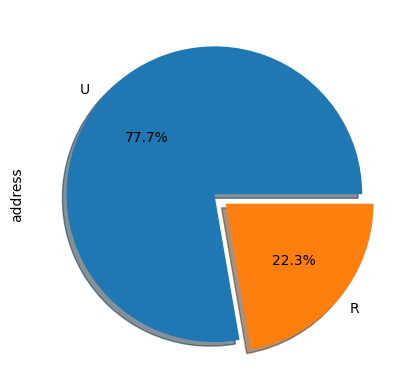

In [126]:
data['address'].value_counts().plot.pie(shadow=True,label='address',explode=[0,0.1], autopct='%1.1f%%')

<Axes: ylabel='famsize'>

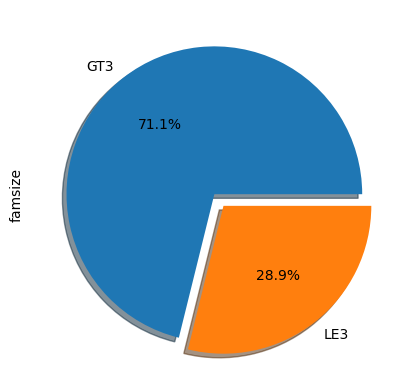

In [127]:
data['famsize'].value_counts().plot.pie(shadow=True,label='famsize',explode=[0,0.1], autopct='%1.1f%%')

<Axes: ylabel='Fjob'>

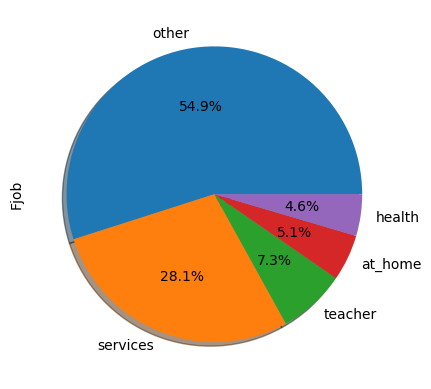

In [128]:
data['Fjob'].value_counts().plot.pie(shadow=True,label='Fjob', autopct='%1.1f%%')

<Axes: ylabel='Mjob'>

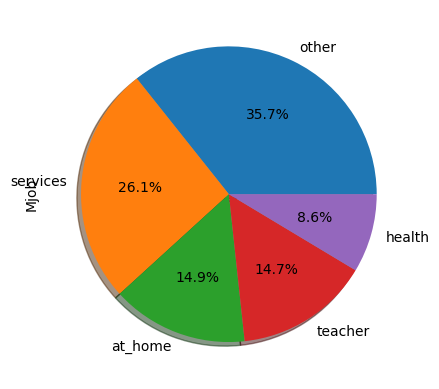

In [129]:
data['Mjob'].value_counts().plot.pie(shadow=True,label='Mjob', autopct='%1.1f%%')

<Axes: ylabel='guardian'>

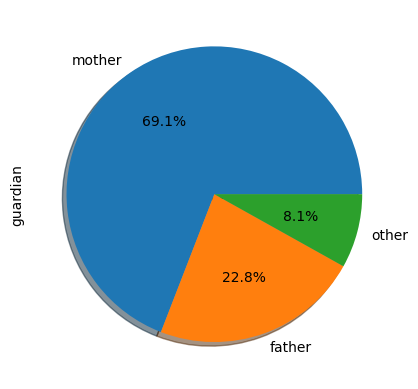

In [130]:
data['guardian'].value_counts().plot.pie(shadow=True,label='guardian', autopct='%1.1f%%')

<Axes: >

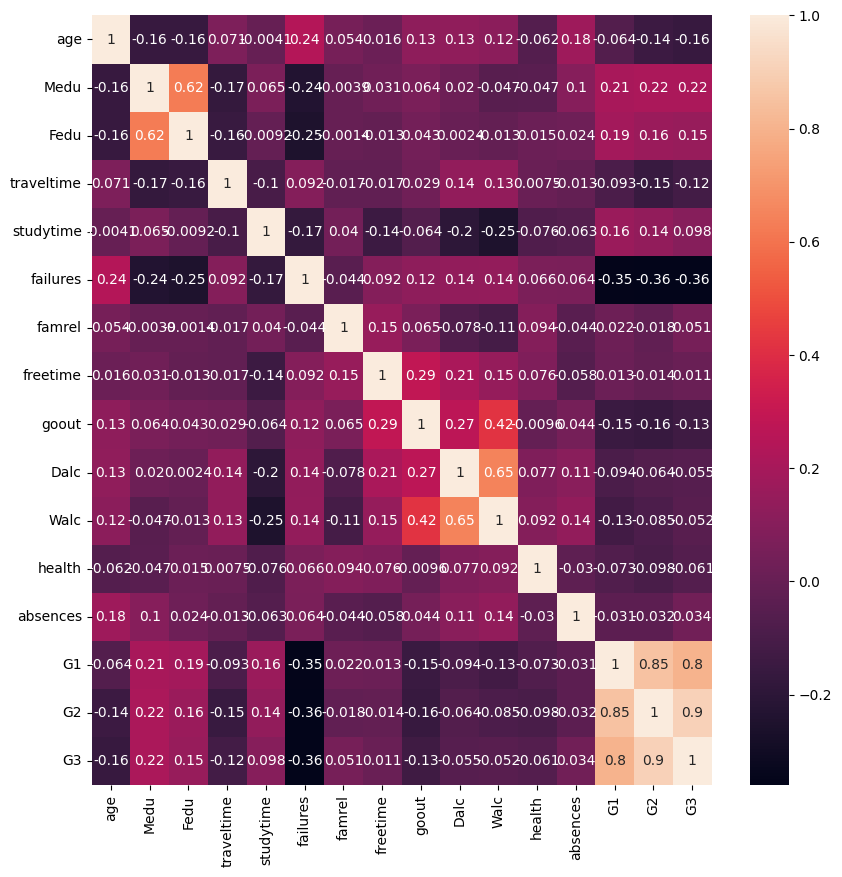

In [131]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.select_dtypes(np.number).corr(), annot=True)


# 3- Missing values 

<Axes: >

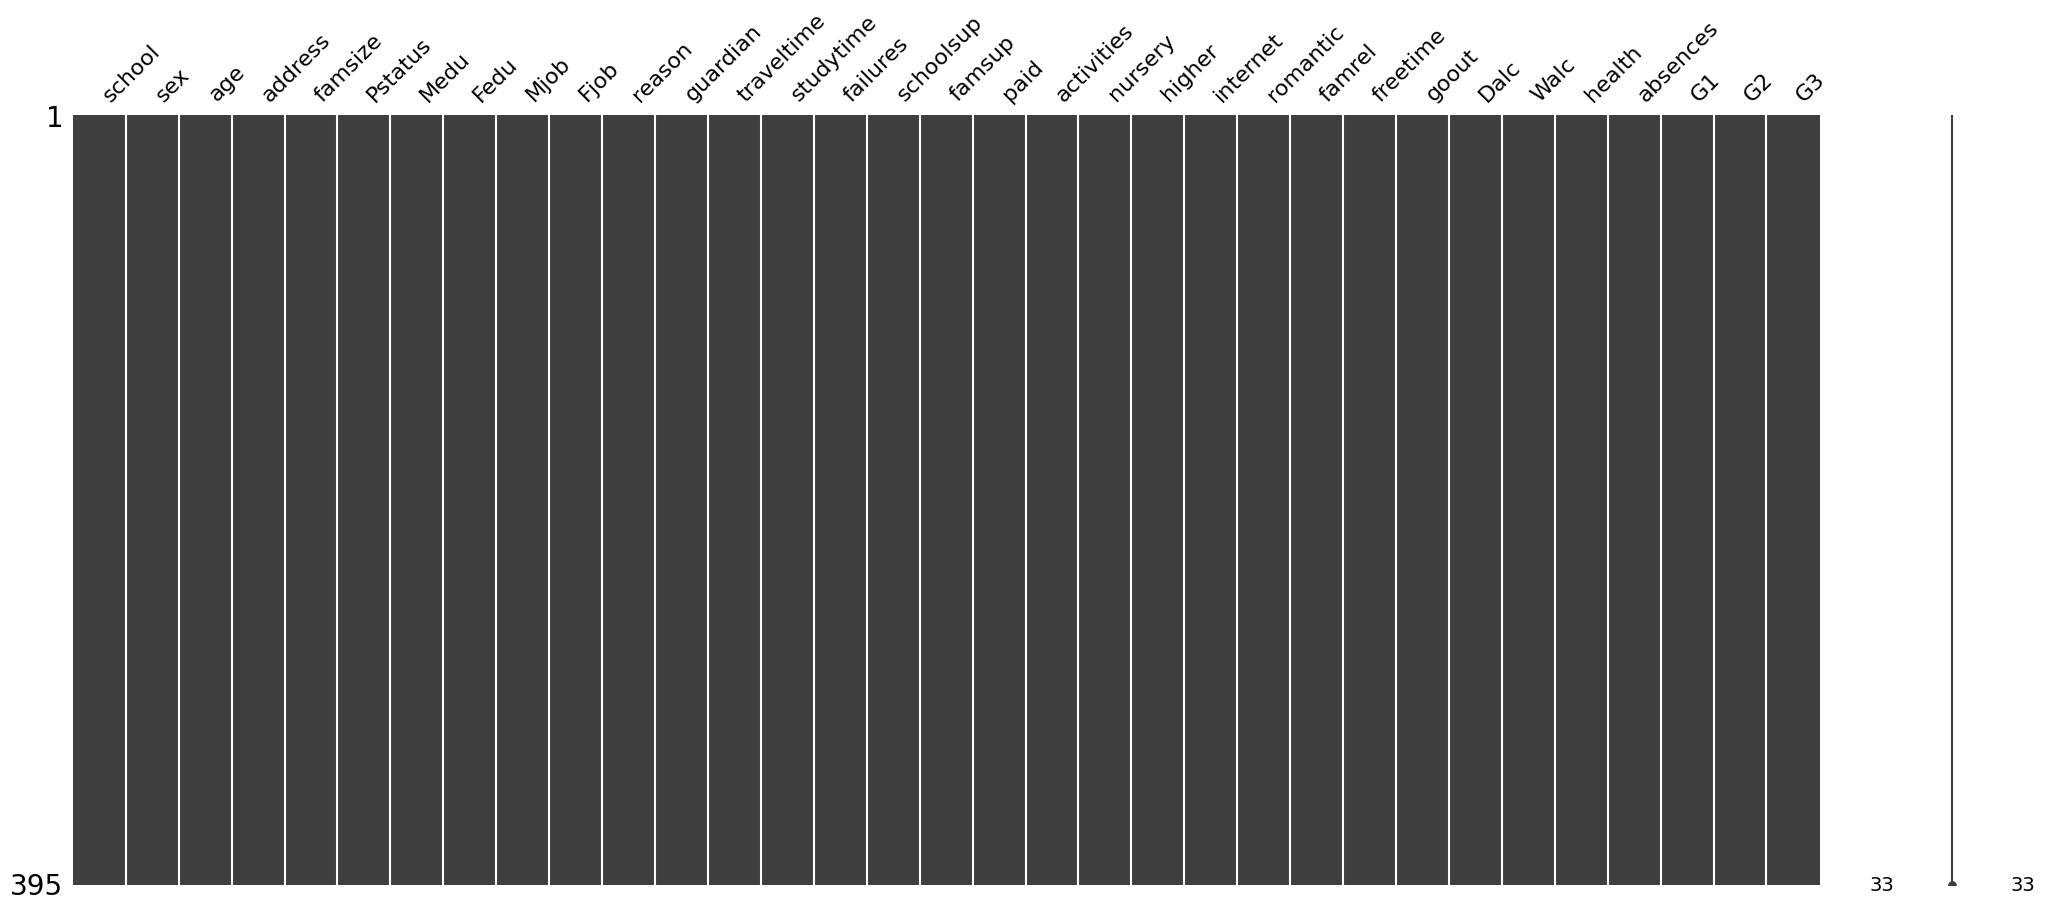

In [132]:
msgn.matrix(data)

thanks the god, data is clean! 

# 4- outliers

<Axes: xlabel='absences'>

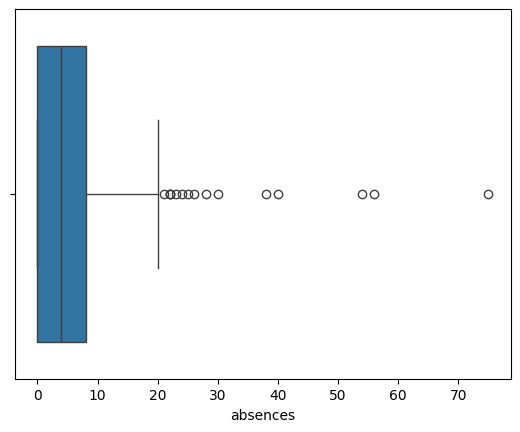

In [133]:
sns.boxplot(x= data['absences'])

In [134]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

<Axes: >

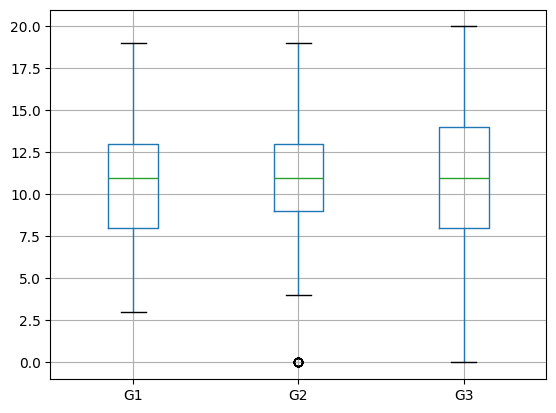

In [135]:
data.boxplot(column=['G1', 'G2', 'G3'])

In [136]:
def remove_outliers(data, columns, threshold=1):
    outlier_indices = []
    for col in columns:
        Q1 = data[col].quantile(0.2)
        Q3 = data[col].quantile(0.8)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        outlier_index = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outlier_indices.extend(outlier_index)
    
    outlier_indices = list(set(outlier_indices))
    
    clean_data = data.drop(outlier_indices)
    
    return clean_data


In [137]:
cols = ['absences', 'age','G1', 'G2', 'G3']
data = remove_outliers(data, columns=cols)

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, 'absences'),
  Text(2, 0, 'age'),
  Text(3, 0, 'G1'),
  Text(4, 0, 'G2'),
  Text(5, 0, 'G3')])

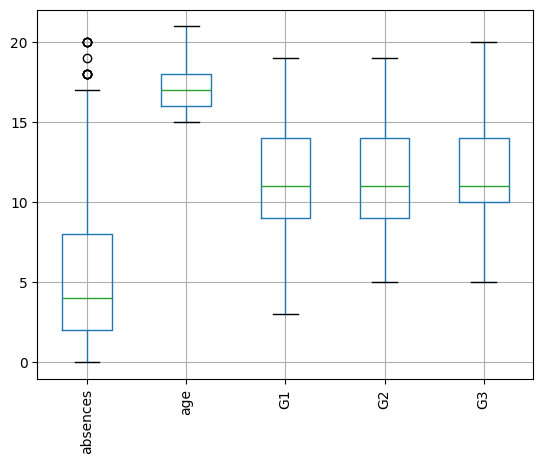

In [138]:
data.boxplot(column=cols)
plt.xticks(rotation = 90)

In [140]:
data = data[data['absences'] <= 16]

In [141]:
data.shape

(330, 33)

In [142]:
data['G2'].describe()

count    330.000000
mean      11.472727
std        3.121771
min        5.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       19.000000
Name: G2, dtype: float64

(<seaborn.axisgrid.FacetGrid at 0x285a2608590>,
 <seaborn.axisgrid.FacetGrid at 0x285a2c75350>)

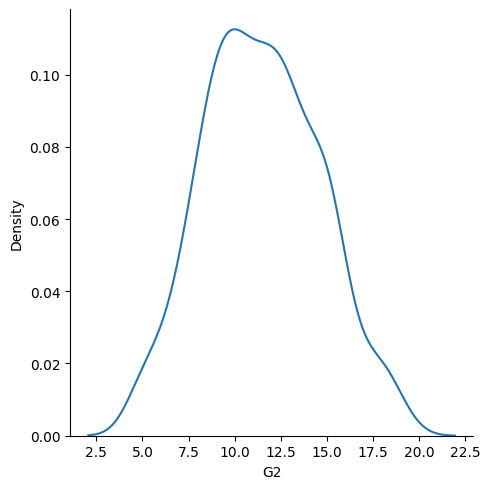

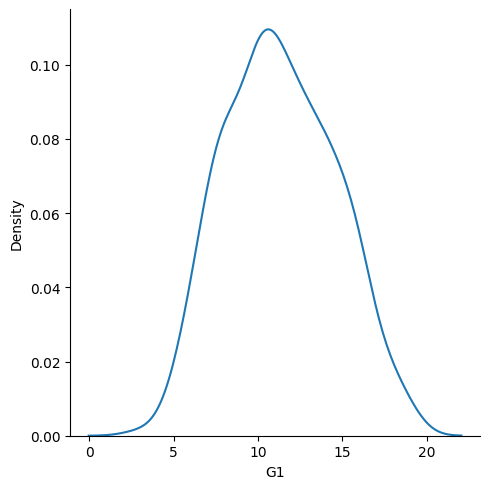

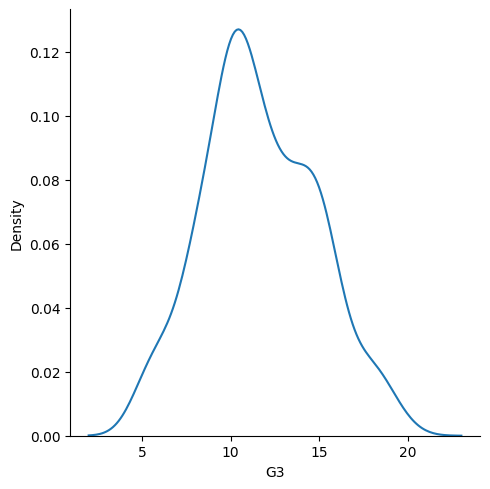

In [144]:
sns.displot(data['G2'], kind='kde'), sns.displot(data['G1'], kind='kde'), sns.displot(data['G3'], kind='kde')

# 5- Feature engineering and transformation 

In [145]:
visualise_features(data)

col name: school
uniques: ['GP' 'MS']
number  of uniques2
type: <class 'str'>
------------------------------------------------------------------------------------------------------------------------------------------------------
col name: sex
uniques: ['F' 'M']
number  of uniques2
type: <class 'str'>
------------------------------------------------------------------------------------------------------------------------------------------------------
col name: age
uniques: [18 17 15 16 19 20 21]
number  of uniques7
type: <class 'numpy.int64'>
------------------------------------------------------------------------------------------------------------------------------------------------------
col name: address
uniques: ['U' 'R']
number  of uniques2
type: <class 'str'>
------------------------------------------------------------------------------------------------------------------------------------------------------
col name: famsize
uniques: ['GT3' 'LE3']
number  of uniques2
type: <class 

1- we need to one-hot encode these features:['schoolsup', 'famsup', 'paid','activities', 'nursery','higher', 'internet', 'romantic', 'sex', 'school', 'address', 'famsize', 'Pstatus']

2- we are going to target encode these faetures: 
['Mjob', 'Fjob', 'reason', 'guardian']

3- we are going to normalise:
['absences', 'G1', 'G2']


In [146]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [147]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [148]:
data.shape

(330, 33)

In [153]:
# train-test split
X = data.drop(['G3'], axis = 1)
y = data['G3']

x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=14)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=14)

In [154]:
categorical_cols1 = ['schoolsup', 'famsup', 'paid','activities', 'nursery','higher', 
                    'internet', 'romantic', 'sex', 'school', 'address', 'famsize', 'Pstatus']
categorical_cols2 = ['Mjob', 'Fjob', 'reason', 'guardian']
numerical_cols = ['absences', 'age', 'G1', 'G2']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat_1', OrdinalEncoder(), categorical_cols1), 
        ('cat_2', OneHotEncoder(), categorical_cols2), 
        ('numerical', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough' 
)

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

x_train_encoded = pipeline.fit_transform(x_train)
x_test_encoded = pipeline.fit_transform(x_test)
x_val_encoded = pipeline.fit_transform(x_val)

In [155]:
x_train_encoded.shape, x_test_encoded.shape

((231, 45), (49, 45))

In [156]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

mlp_reg = MLPRegressor(hidden_layer_sizes=(450,256, 128, 64), max_iter=1000,
                        random_state=42, learning_rate='adaptive', learning_rate_init=0.0001, 
                        alpha=0.1)

mlp_reg.fit(x_train_encoded, y_train)

y_pred = mlp_reg.predict(x_test_encoded)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.6349192178143568


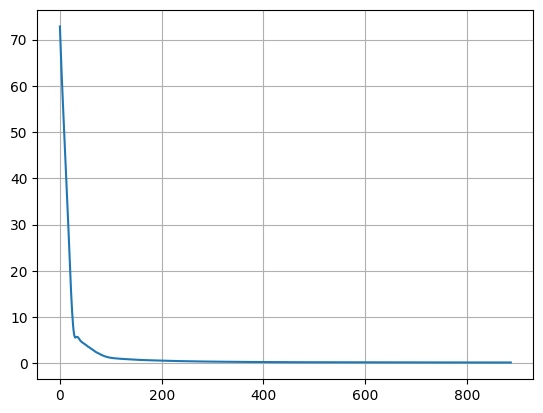

In [157]:
plt.plot(mlp_reg.loss_curve_)
plt.grid(True)

In [158]:
mlp_reg.score(x_test_encoded, y_test)

0.8449055297521821

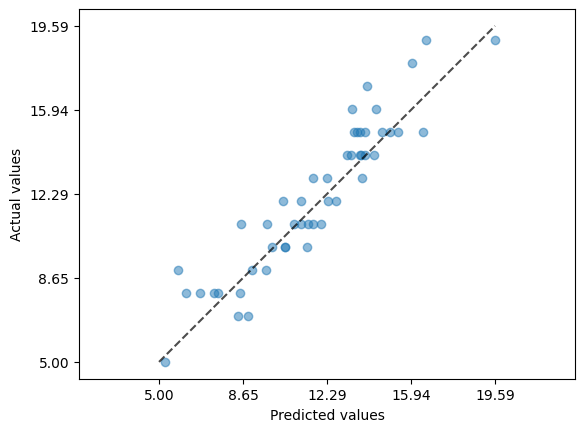

In [159]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
)

## Hyperparameter tuning

In [46]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer


# mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# param_grid = {
#     'hidden_layer_sizes': [(450, 256, 128, 64), (200, 100), (300, 200, 100)],
#     'max_iter': [10000, 5000],
#     'learning_rate': ['constant', 'adaptive'],
#     'learning_rate_init': [0.001, 0.0001],
#     'alpha': [0.1, 0.01]
# }

# mlp_reg = MLPRegressor(random_state=42)

# grid_search = GridSearchCV(mlp_reg, param_grid, cv=5, scoring=mse_scorer)

# grid_search.fit(x_train_encoded, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Negative Mean Squared Error:", grid_search.best_score_)

Best ParametersL: {'hidden_layer_sizes': (450, 256, 128, 64), 'max_iter': 5000, 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'alpha': 0.1}


# Pytorch implementation 

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class MLPWithDropout(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_prob=0.5):
        super(MLPWithDropout, self).__init__()
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.dropout_prob = dropout_prob

        self.fc_layers = nn.ModuleList()
        self.fc_layers.append(nn.Linear(input_size, hidden_sizes[0]))
        for i in range(1, len(hidden_sizes)):
            self.fc_layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
        
        self.dropout_layers = nn.ModuleList()
        for _ in range(len(hidden_sizes)):
            self.dropout_layers.append(nn.Dropout(dropout_prob))
        
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        x = x.view(-1, self.input_size)
        
        for fc_layer, dropout_layer in zip(self.fc_layers, self.dropout_layers):
            x = torch.relu(fc_layer(x))
            x = dropout_layer(x)
    
        x = self.output_layer(x)
        return x

In [160]:
x_train_tensor = torch.tensor(x_train_encoded, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
x_test_tensor = torch.tensor(x_test_encoded, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)
x_val_tensor = torch.tensor(x_val_encoded, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1) 

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

In [161]:
#model configuration

input_size = x_train_encoded.shape[1]
hidden_sizes = [450, 256, 128, 64]
output_size = 1  # for regression
dropout_prob = 0.5  # dropout probability
model = MLPWithDropout(input_size, hidden_sizes, output_size, dropout_prob)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [162]:
def train_loop(model, criterion, optimizer, num_epochs):

    train_loss, val_loss = [], []
    epochs = num_epochs
    for epoch in range(epochs):
        model.train()  
        running_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        t_loss = running_loss / len(train_loader.dataset)
        train_loss.append(t_loss)
        
        model.eval() 
        with torch.no_grad():
            running_loss = 0.0
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                running_loss += loss.item() * inputs.size(0)
            v_loss = running_loss / len(val_loader.dataset)
            val_loss.append(v_loss)
            
        
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {t_loss:.4f}, validation Loss: {v_loss:.4f}')
        
    return train_loss, val_loss

In [163]:
train_loss, val_loss = train_loop(model, criterion, optimizer, 500)

Epoch 1/500, Train Loss: 139.8454, validation Loss: 132.1656
Epoch 2/500, Train Loss: 135.5302, validation Loss: 127.2645
Epoch 3/500, Train Loss: 128.7789, validation Loss: 117.8391
Epoch 4/500, Train Loss: 115.3005, validation Loss: 99.2445
Epoch 5/500, Train Loss: 90.9127, validation Loss: 66.3890
Epoch 6/500, Train Loss: 52.7513, validation Loss: 26.5384
Epoch 7/500, Train Loss: 26.0211, validation Loss: 12.0945
Epoch 8/500, Train Loss: 26.2726, validation Loss: 11.3855
Epoch 9/500, Train Loss: 23.5262, validation Loss: 11.1268
Epoch 10/500, Train Loss: 21.8889, validation Loss: 10.9124
Epoch 11/500, Train Loss: 19.8402, validation Loss: 9.9038
Epoch 12/500, Train Loss: 18.8536, validation Loss: 9.2222
Epoch 13/500, Train Loss: 20.8923, validation Loss: 8.8461
Epoch 14/500, Train Loss: 16.4745, validation Loss: 7.9326
Epoch 15/500, Train Loss: 18.5947, validation Loss: 7.7929
Epoch 16/500, Train Loss: 16.4012, validation Loss: 7.0023
Epoch 17/500, Train Loss: 16.8957, validation Lo

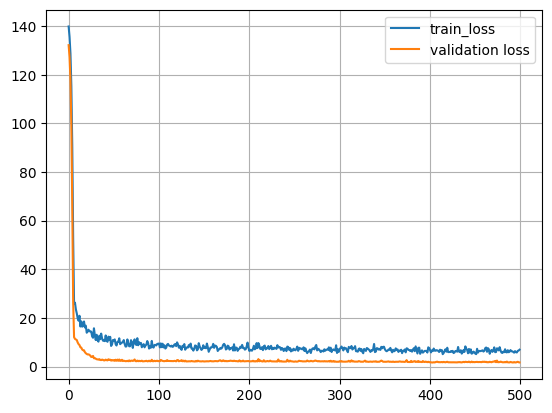

In [164]:
plt.plot(train_loss, label = 'train_loss')
plt.plot(val_loss, label = 'validation loss')
plt.legend()
plt.grid()

In [165]:
from sklearn.metrics import r2_score

model.eval()

y_pred = 0
with torch.no_grad():
    y_pred = model(x_test_tensor).numpy()


r2 = r2_score(y_test_tensor.numpy(), y_pred)
print("R2 Score:", r2)


R2 Score: 0.7998968909999515


In [166]:
print(f"Test MSE: {mean_squared_error(y_test_tensor, y_pred)}")

Test MSE: 2.109375238418579


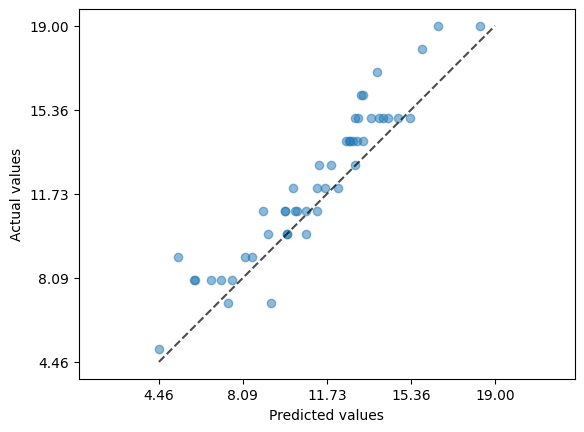

In [167]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
)

In [169]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(criterion='absolute_error', random_state=14)
rf.fit(x_train_encoded, y_train)

RandomForestRegressor(criterion='absolute_error', random_state=14)

In [170]:
rf.score(x_test_encoded, y_test)

0.8848749743184512

In [173]:
mean_squared_error(rf.predict(x_test_encoded), y_test)

1.213583673469388

In [181]:
from tqdm import tqdm

In [190]:
def train_neural_network(input_size, hidden_sizes, output_size, loss_function, 
                         optimizer, activation_function, dropout_prob, learning_rate, 
                         num_epochs, train_loader, val_loader, test_loader):
    class NeuralNetwork(nn.Module):
        def __init__(self, input_size, hidden_sizes, output_size, activation_function, dropout_prob):
            super(NeuralNetwork, self).__init__()
            layers = []
            for i in range(len(hidden_sizes)):
                if i == 0:
                    layers.append(nn.Linear(input_size, hidden_sizes[i]))
                else:
                    layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
                layers.append(activation_function)
                layers.append(nn.Dropout(dropout_prob))
            layers.append(nn.Linear(hidden_sizes[-1], output_size))
            self.model = nn.Sequential(*layers)
        
        def forward(self, x):
            return self.model(x)
    
    model = NeuralNetwork(input_size, hidden_sizes, output_size, activation_function, dropout_prob)

    criterion = loss_function
    optimizer = optimizer(model.parameters(), lr=learning_rate)

    def evaluate(model, data_loader, is_test = False):
        model.eval()
        all_predictions = []
        all_targets = []
        mse = 0
        if not is_test:
            with torch.no_grad():
                for inputs, targets in data_loader:
                    outputs = model(inputs)
                    all_predictions.extend(outputs.tolist())
                    all_targets.extend(targets.tolist())
        else:
            total_loss = 0
            with torch.no_grad():
                for inputs, targets in data_loader:
                    outputs = model(inputs)
                    loss = criterion(outputs, targets)
                    total_loss += loss.item() * inputs.size(0)
                    all_predictions.extend(outputs.tolist())
                    all_targets.extend(targets.tolist())
            mse = mean_squared_error(all_targets, all_predictions)
        r2 = r2_score(all_targets, all_predictions)
        return r2, mse
    
    t_loss = []
    t_r2 = []
    v_loss = []
    v_r2 = []

    for epoch in range(num_epochs):

        model.train()
        train_loss = 0.0
        for inputs, targets in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
        train_loss /= len(train_loader.dataset)
        t_loss.append(train_loss)
        t_r2.append(evaluate(model, train_loader))

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                val_loss += criterion(outputs, targets).item()
        val_loss /= len(val_loader.dataset)
        v_loss.append(val_loss)
        v_r2.append(evaluate(model, val_loader))
    
   
    
    test_r2, test_mse = evaluate(model, test_loader, True)
    
    return t_loss, v_loss, t_r2, v_r2, test_r2, test_mse

# using tanH as activation

In [210]:
#model configuration

input_size = x_train_encoded.shape[1]
hidden_sizes = [450, 256, 128, 64]
output_size = 1  # for regression
dropout_prob = 0.5 # dropout probability
criterion = nn.MSELoss()
optimizer = optim.Adam
activation = nn.Tanh()
lr = 0.001
epochs = 100

In [211]:
t_loss, v_loss, t_r2, v_r2, test_r2, test_mse = train_neural_network(input_size, hidden_sizes, output_size, criterion, optimizer, activation, dropout_prob, lr, epochs,
                     train_loader, val_loader, test_loader)

Epoch 100/100: 100%|██████████| 15/15 [00:00<00:00, 211.61it/s]


In [212]:
def plot_curves(train, val):
    plt.plot(train, label = 'train_loss')
    plt.plot(val, label = 'validation loss')
    plt.legend()
    plt.grid()

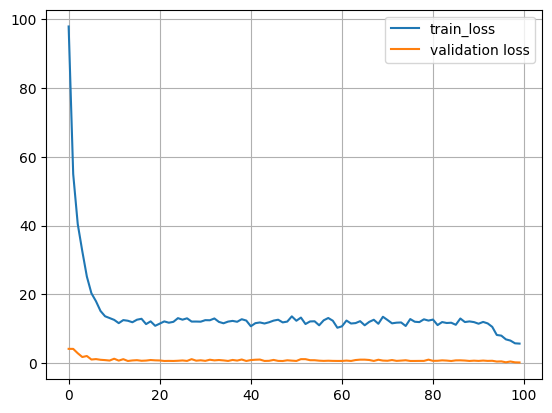

In [213]:
plot_curves(t_loss, v_loss)

In [214]:
print(f"test_mse: {test_mse} test_r-2: {test_r2}")

test_mse: 3.120669322264028 test_r-2: 0.703961792068118


# using SGD as Criterion and leakyReLU

In [233]:
#model configuration

input_size = x_train_encoded.shape[1]
hidden_sizes = [450, 256, 128, 64]
output_size = 1  # for regression
dropout_prob = 0.5 # dropout probability
criterion = nn.MSELoss()
optimizer = optim.SGD
activation = nn.LeakyReLU()
lr = 0.001
epochs = 500

In [234]:
t_loss, v_loss, t_r2, v_r2, test_r2, test_mse = train_neural_network(input_size, hidden_sizes, output_size, criterion, optimizer, activation, dropout_prob, lr, epochs,
                     train_loader, val_loader, test_loader)

Epoch 500/500: 100%|██████████| 15/15 [00:00<00:00, 315.80it/s]


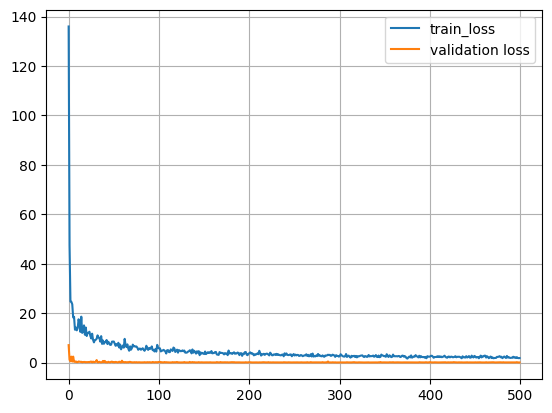

In [235]:
plot_curves(t_loss, v_loss)

In [236]:
print(f"test_mse: {test_mse} test_r-2: {test_r2}")

test_mse: 1.6415855299401532 test_r-2: 0.8442731387836306
